In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
#pd.options.display.float_format = '{:.4%}'.format

start = '2008-01-01'
end = '2022-11-22'
assets = ["PFE", "JNJ", "GOOGL", 
           "AAPL", "COST", "WMT", "KR", "JPM", 
          "BAC", "HSBC"]

assets.sort()

df = yf.download(assets, start = start, end = end)
#df = df.loc[:,('Adj Close', slice(None))]
#df.columns = assets

[*********************100%***********************]  10 of 10 completed


In [5]:
df.columns

MultiIndex([('Adj Close',  'AAPL'),
            ('Adj Close',   'BAC'),
            ('Adj Close',  'COST'),
            ('Adj Close', 'GOOGL'),
            ('Adj Close',  'HSBC'),
            ('Adj Close',   'JNJ'),
            ('Adj Close',   'JPM'),
            ('Adj Close',    'KR'),
            ('Adj Close',   'PFE'),
            ('Adj Close',   'WMT'),
            (    'Close',  'AAPL'),
            (    'Close',   'BAC'),
            (    'Close',  'COST'),
            (    'Close', 'GOOGL'),
            (    'Close',  'HSBC'),
            (    'Close',   'JNJ'),
            (    'Close',   'JPM'),
            (    'Close',    'KR'),
            (    'Close',   'PFE'),
            (    'Close',   'WMT'),
            (     'High',  'AAPL'),
            (     'High',   'BAC'),
            (     'High',  'COST'),
            (     'High', 'GOOGL'),
            (     'High',  'HSBC'),
            (     'High',   'JNJ'),
            (     'High',   'JPM'),
            (     'High',   

In [3]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

In [4]:
train = df.loc[df.index < '01-01-2022']
test = df.loc[df.index >= '01-01-2022']

In [5]:
test

,AAPL,BAC,COST,GOOGL,HSBC,JNJ,JPM,KR,PFE,WMT
Date,,,,,,,,,,
2022-01-03,180.959732,45.393047,562.943604,144.991501,29.195259,168.227264,156.752396,44.318127,54.868088,142.948257
2022-01-04,178.663071,47.172203,560.480042,144.399506,30.508804,167.776154,162.694855,45.279224,52.814774,140.329437
2022-01-05,173.910660,46.376007,546.265137,137.774994,30.249929,168.894150,159.720444,45.906876,53.880169,142.226837
2022-01-06,171.007507,47.309818,546.145935,137.747498,31.112846,168.315536,161.417328,46.210892,53.115025,141.831558
2022-01-07,171.176544,48.341923,532.616455,137.016998,31.390896,170.590744,163.016678,47.191601,53.967346,143.185425
...,...,...,...,...,...,...,...,...,...,...
2022-11-11,149.699997,38.410000,515.469971,96.410004,28.049999,169.250000,135.300003,46.840000,47.599998,142.580002
2022-11-14,148.279999,37.759998,509.679993,95.699997,28.190001,171.910004,133.910004,46.560001,49.240002,138.389999
2022-11-15,150.039993,37.700001,526.469971,98.440002,28.250000,172.389999,132.940002,46.869999,48.570000,147.440002


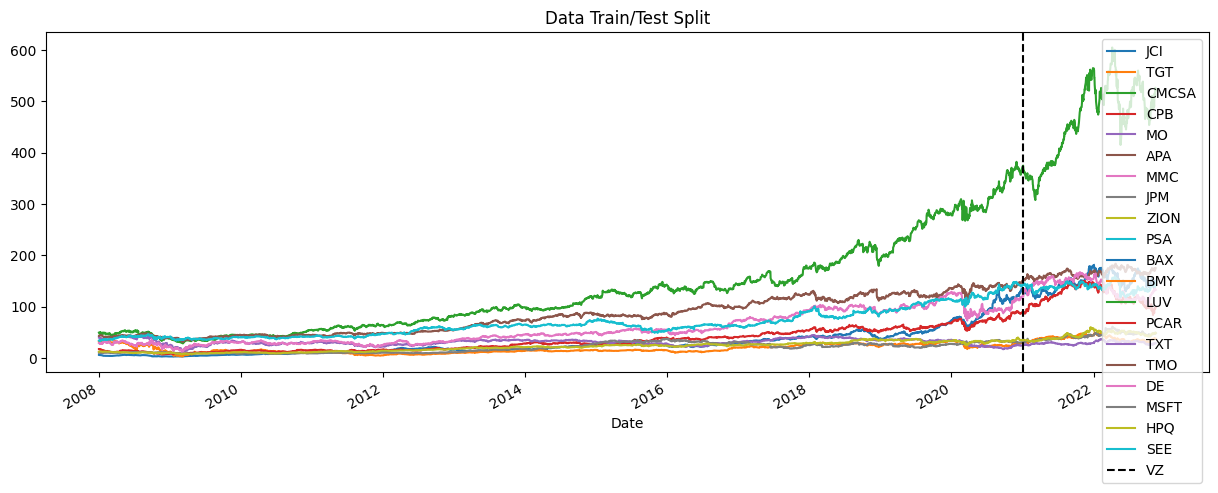

In [6]:
fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2021', color='black', ls='--')
ax.legend(['JCI', 'TGT', 'CMCSA', 'CPB', 'MO', 'APA', 'MMC', 'JPM',
          'ZION', 'PSA', 'BAX', 'BMY', 'LUV', 'PCAR', 'TXT', 'TMO',
          'DE', 'MSFT', 'HPQ', 'SEE', 'VZ', 'CNP', 'NI', 'T', 'BA'])
plt.show()

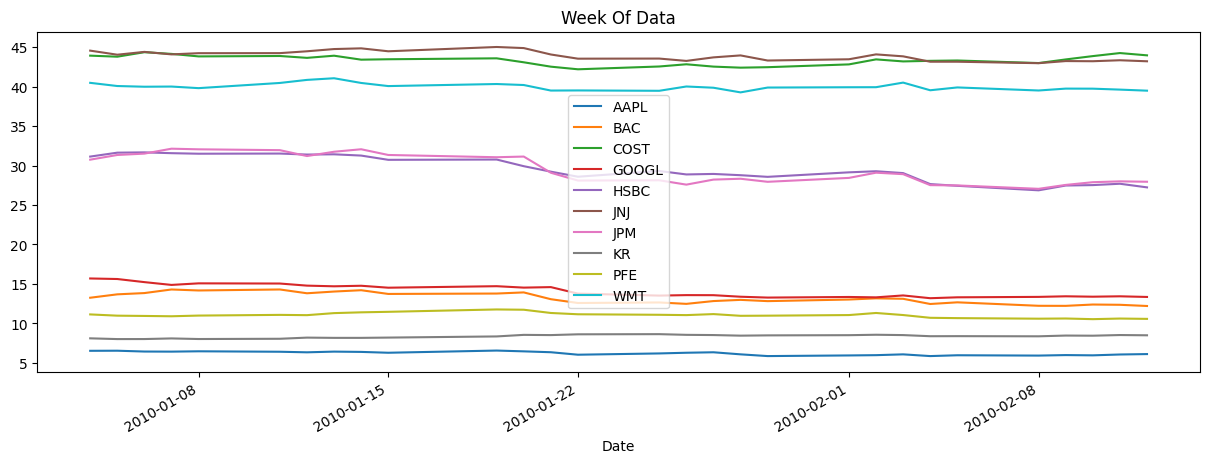

In [7]:
df.loc[(df.index > '01-01-2010') & (df.index < '02-16-2010')] \
    .plot(figsize=(15, 5), title='Week Of Data')
plt.show()

In [8]:
test = create_features(test)
train = create_features(train)

In [9]:
test

,AAPL,BAC,COST,GOOGL,HSBC,JNJ,JPM,KR,PFE,WMT,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Date,,,,,,,,,,,,,,,,,,
2022-01-03,180.959732,45.393047,562.943604,144.991501,29.195259,168.227264,156.752396,44.318127,54.868088,142.948257,0,0,1,1,2022,3,3,1
2022-01-04,178.663071,47.172203,560.480042,144.399506,30.508804,167.776154,162.694855,45.279224,52.814774,140.329437,0,1,1,1,2022,4,4,1
2022-01-05,173.910660,46.376007,546.265137,137.774994,30.249929,168.894150,159.720444,45.906876,53.880169,142.226837,0,2,1,1,2022,5,5,1
2022-01-06,171.007507,47.309818,546.145935,137.747498,31.112846,168.315536,161.417328,46.210892,53.115025,141.831558,0,3,1,1,2022,6,6,1
2022-01-07,171.176544,48.341923,532.616455,137.016998,31.390896,170.590744,163.016678,47.191601,53.967346,143.185425,0,4,1,1,2022,7,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-11,149.699997,38.410000,515.469971,96.410004,28.049999,169.250000,135.300003,46.840000,47.599998,142.580002,0,4,4,11,2022,315,11,45
2022-11-14,148.279999,37.759998,509.679993,95.699997,28.190001,171.910004,133.910004,46.560001,49.240002,138.389999,0,0,4,11,2022,318,14,46
2022-11-15,150.039993,37.700001,526.469971,98.440002,28.250000,172.389999,132.940002,46.869999,48.570000,147.440002,0,1,4,11,2022,319,15,46


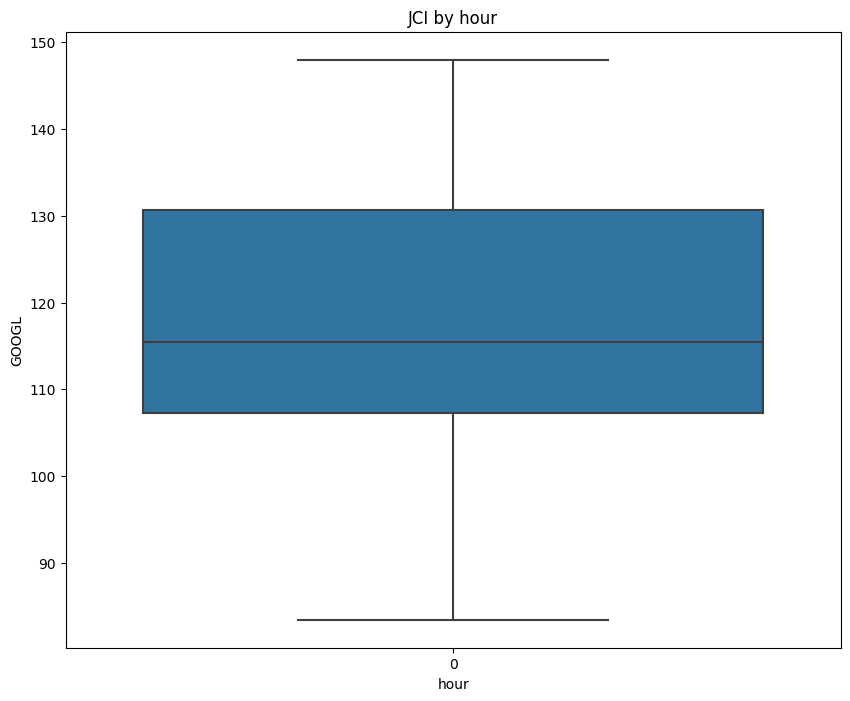

In [10]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=test, x='hour', y='GOOGL')
ax.set_title('JCI by hour')
plt.show()

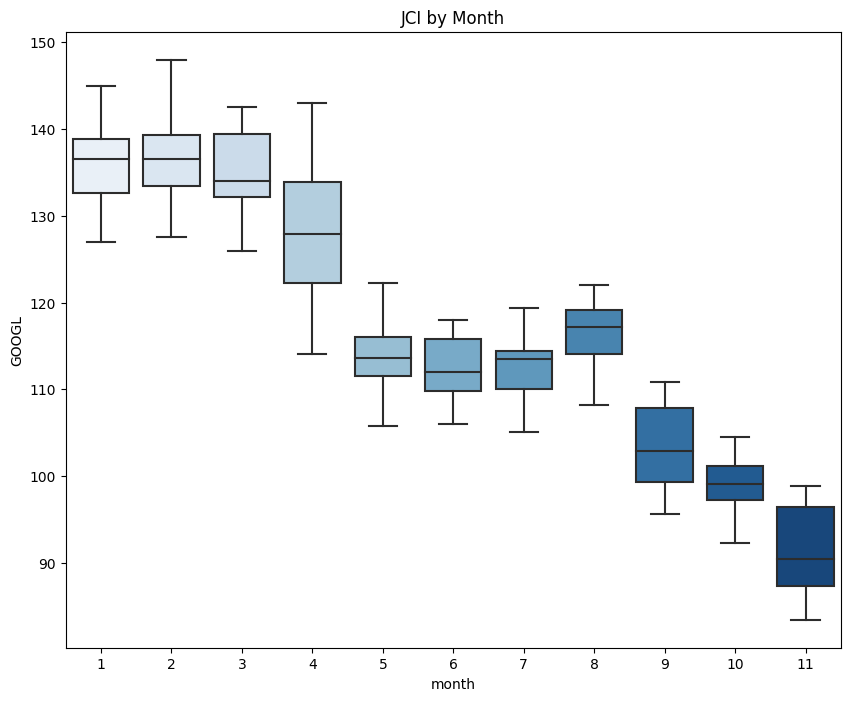

In [11]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=test, x='month', y='GOOGL', palette='Blues')
ax.set_title('JCI by Month')
plt.show()

In [12]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=10000,
                       early_stopping_rounds=100,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)

/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(


In [13]:
#FEATURES = ['dayofyear','dayofweek', 'quarter', 'month', 'year']
#X_test = test[FEATURES]
#X_train = train[FEATURES]
#model = []
#for i in assets:
#        print(i)
#        y_train = train[i]
#        y_test = test[i]
#        reg.fit(X_train, y_train,
#                eval_set=[(X_train, y_train), (X_test, y_test)],
#                verbose=100)
#        model.append(reg.predict(X_test))

In [14]:
#for i,name in enumerate(assets):
#    test[f'prediction{name}'] = model[i]
#    df = df.merge(test[f'prediction{name}'], how='left', left_index=True, right_index=True)
#    ax = df[[name]].plot(figsize=(15, 5))
#    df[f'prediction{name}'].plot(ax=ax, style='.')
#    plt.legend(['Truth Data', 'Predictions'])
#    ax.set_title(f'{name} Truth Dat and Prediction')
#    plt.show()

In [15]:
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
from pypfopt.efficient_frontier import EfficientCVaR
from pypfopt import HRPOpt

In [16]:
#Mean Variance Optimization
mu = mean_historical_return(df)
S = CovarianceShrinkage(df).ledoit_wolf()

In [17]:
#ef = EfficientFrontier(mu, S)
#weights = ef.max_sharpe()

#cleaned_weights = ef.clean_weights()
#print(cleaned_weights)

In [18]:
#ef.portfolio_performance(verbose=True)

In [19]:
#latest_prices = get_latest_prices(df)
#
#da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=100000)
#
#allocation, leftover = da.greedy_portfolio()
#print("Discrete allocation:", allocation)
#print("Funds remaining: ${:.2f}".format(leftover))

In [20]:
#Hierarchical Risk Parity (HRP)
returns = df.pct_change().dropna()

In [21]:
hrp = HRPOpt(returns)
hrp_weights = hrp.optimize()

In [22]:
hrp.portfolio_performance(verbose=True)
x = []
for i in assets:
    x.append(hrp_weights[i])
print(x)

plt.show()


Expected annual return: 13.3%
Annual volatility: 17.3%
Sharpe Ratio: 0.65
[0.05112930669480829, 0.028092652320258513, 0.09505037142999025, 0.05803162502717344, 0.08713520899967264, 0.2648532970172292, 0.05088912445564838, 0.11236910732507657, 0.1395382677946434, 0.11291103893549935]


TypeError: float() argument must be a string or a real number, not 'collections.OrderedDict'

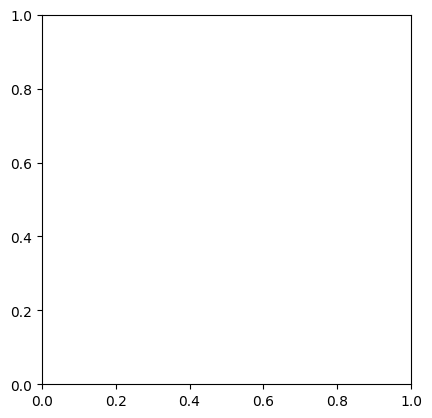

In [23]:
plt.pie(hrp_weights)
plt.show(dict(hrp_weights))

In [ ]:
da_hrp = DiscreteAllocation(hrp_weights, latest_prices, total_portfolio_value=100000)

allocation, leftover = da_hrp.greedy_portfolio()
print("Discrete allocation (HRP):", allocation)
print("Funds remaining (HRP): ${:.2f}".format(leftover))

Discrete allocation (HRP): {'JNJ': 152, 'PFE': 289, 'WMT': 76, 'KR': 233, 'COST': 18, 'HSBC': 304, 'GOOGL': 59, 'AAPL': 34, 'JPM': 39, 'BAC': 75}
Funds remaining (HRP): $23.36


In [ ]:
#Mean Conditional Value at Risk (mCVAR)
S = df.cov()
ef_cvar = EfficientCVaR(mu, S)
cvar_weights = ef_cvar.min_cvar()

cleaned_weights = ef_cvar.clean_weights()
print(dict(cleaned_weights))

{'AAPL': 0.0, 'BAC': 0.0, 'COST': 0.0, 'GOOGL': 0.0, 'HSBC': 0.0, 'JNJ': 0.0, 'JPM': 1.0, 'KR': 0.0, 'PFE': 0.0, 'WMT': 0.0}


In [ ]:
S = returns.cov()
ef_cvar = EfficientCVaR(mu, S)
cvar_weights = ef_cvar.min_cvar()

cleaned_weights = ef_cvar.clean_weights()
print(dict(cleaned_weights))

{'AAPL': 0.0, 'BAC': 0.85969, 'COST': 0.0, 'GOOGL': 0.0, 'HSBC': 0.0, 'JNJ': 0.0, 'JPM': 0.0, 'KR': 0.0, 'PFE': 0.0, 'WMT': 0.14031}


In [ ]:
da_cvar = DiscreteAllocation(cvar_weights, latest_prices, total_portfolio_value=100000)

allocation, leftover = da_cvar.greedy_portfolio()
print("Discrete allocation (CVAR):", allocation)
print("Funds remaining (CVAR): ${:.2f}".format(leftover))

Discrete allocation (CVAR): {'JPM': 754, 'HSBC': 1}
Funds remaining (CVAR): $36.27


In [ ]:
latest_prices = discrete_allocation.get_latest_prices(df_stocks)
# Allocate Portfolio Value in $ as required to show number of shares/stocks to buy, also bounds for shorting will affect allocation
#Min Volatility Portfolio Allocation $10000
allocation_minv, rem_minv = discrete_allocation.DiscreteAllocation(minvol_pwt, latest_prices, total_portfolio_value=10000).lp_portfolio()
print(allocation_minv)
print("Leftover Fund value in$ after building minimum volatility portfolio is ${:.2f}".format(rem_minv))

NameError: name 'discrete_allocation' is not defined